# Import dependencies

In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as shc 
from sklearn.model_selection import KFold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import import_dataset, encode_categorical_features, test_classifier, agg_clustering


# Config Params

In [2]:
TEST_SIZE = 0.2
RANDOM_SEED = 42
K_FOLDS = 3

# Our chosen datasets
TODO
We have chosen the datasets based on the following criteria:
- datasets where we do not need to do any special preprocessing so that it is easy to do in only one pipeline
- rather small datasets to ensure we do not need high computational power

In [3]:
# Dataset that seems useful
dataset_id = {
    "iris": 53, 
    "heart_disease": 45, 
    "wine_quality": 186, 
    "breast_cancer_wisconsin_diagnostic": 17, 
    "car_evaluation": 19, 
    "abalone": 1, 
    "mushroom": 73, 
    "statlog" : 144, 
    "credit_approval" : 27, 
    "zoo" : 111, 
    "balance_scale" : 12, 
    "ilpd" : 225, 
    "acute_inflamations" : 184, 
    "ecoli" : 39, 
    "mammographic_mass" : 161, 
    "hayes_roth" : 44, 
    "habermans_survival" : 43, 
    "congress_voting_records" : 105, 
    "balloons" : 13, 
    "lenses" : 58, 
    "fertility" : 244, 
}

data_set_sorted = {}
for i, name in enumerate(sorted(dataset_id.keys())):
    data_set_sorted[name] =(dataset_id[name], i)

print(data_set_sorted)


{'abalone': (1, 0), 'acute_inflamations': (184, 1), 'balance_scale': (12, 2), 'balloons': (13, 3), 'breast_cancer_wisconsin_diagnostic': (17, 4), 'car_evaluation': (19, 5), 'congress_voting_records': (105, 6), 'credit_approval': (27, 7), 'ecoli': (39, 8), 'fertility': (244, 9), 'habermans_survival': (43, 10), 'hayes_roth': (44, 11), 'heart_disease': (45, 12), 'ilpd': (225, 13), 'iris': (53, 14), 'lenses': (58, 15), 'mammographic_mass': (161, 16), 'mushroom': (73, 17), 'statlog': (144, 18), 'wine_quality': (186, 19), 'zoo': (111, 20)}


# Import and preprocess datasets
For the preprocessing we will do the following steps:
1. Remove any missing values. In the article the following is written: "Given that our classifiers are not oriented to data with missing features, the missing inputs are treated as zero, which should not bias the comparison results." We therefore also decided to just remove missing values and to more focus on the full pipeline instead of single datasets. Another way could have been interpolation.
2. Encode categorical data into numerical data. This we have to do to use the classifiers later on.
3. Remove certain columns if they are highly correlated to others.
4. Split the data into a train and a test set. We will use a 80/20 split.
5. Scale the data so that we have zero mean and standard deviation of one. This is done with the Standard scaler.

abalone


c:\Users\britt\anaconda3\envs\AppliedAILabs\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.40077821011673154, Test accuracy = 0.24043062200956938
knn, Train f1-score = 0.38253583148275055, Test f1-score = 0.22477344651495762
Confusion Matrix for train set


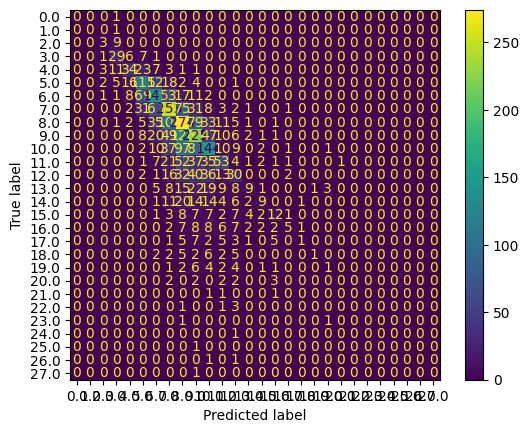

Confusion Matrix for test set


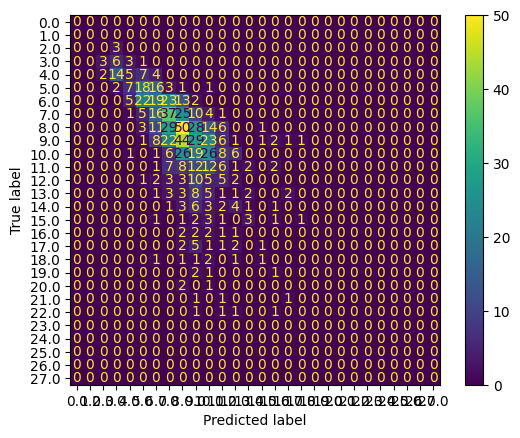

acute_inflamations
{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
knn, Train accuracy = 1.0, Test accuracy = 1.0
knn, Train f1-score = 1.0, Test f1-score = 1.0
Confusion Matrix for train set


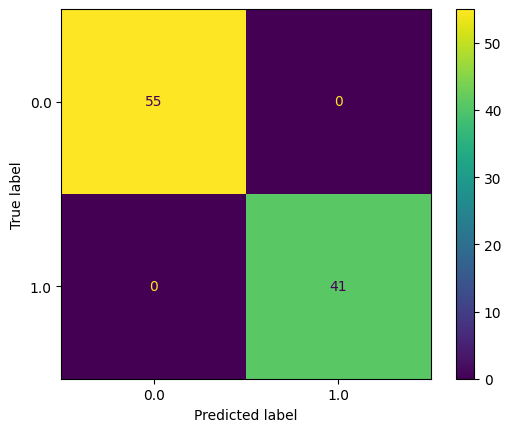

Confusion Matrix for test set


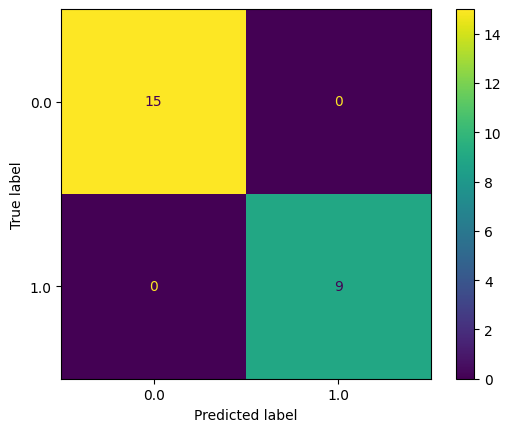

balance_scale
{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.872
knn, Train f1-score = 1.0, Test f1-score = 0.832
Confusion Matrix for train set


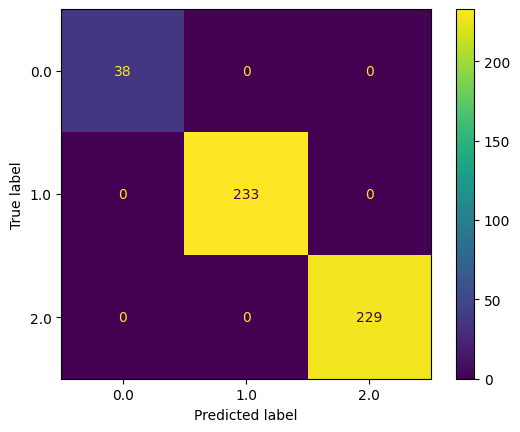

Confusion Matrix for test set


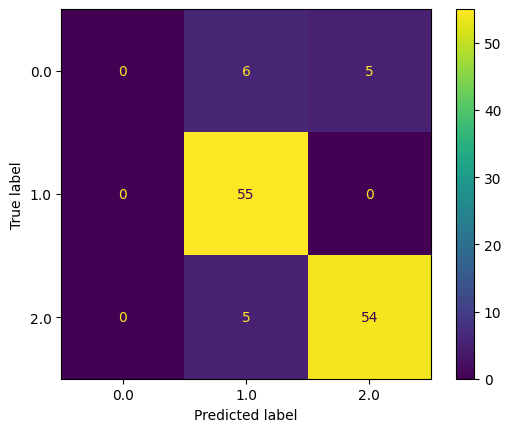

balloons


c:\Users\britt\OneDrive - Luleå University of Technology\AppliedAI\MiniProject\D7041E_Mini_project\utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_cols] = encode_categorical_features(X[categorical_cols], encoder)
c:\Users\britt\anaconda3\envs\AppliedAILabs\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\britt\anaconda3\envs\AppliedAILabs\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\britt\anaconda3\envs\AppliedAILabs

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.6666666666666666, Test accuracy = 1.0
knn, Train f1-score = 0.6458333333333334, Test f1-score = 1.0
Confusion Matrix for train set


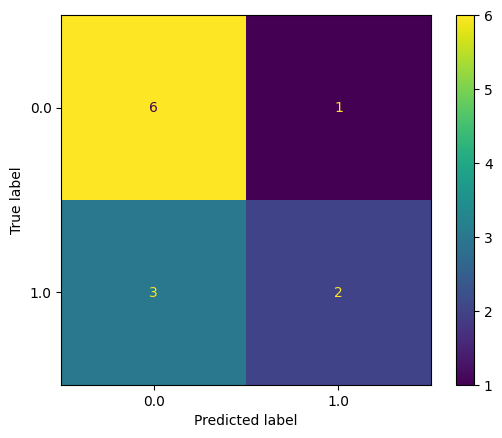

Confusion Matrix for test set


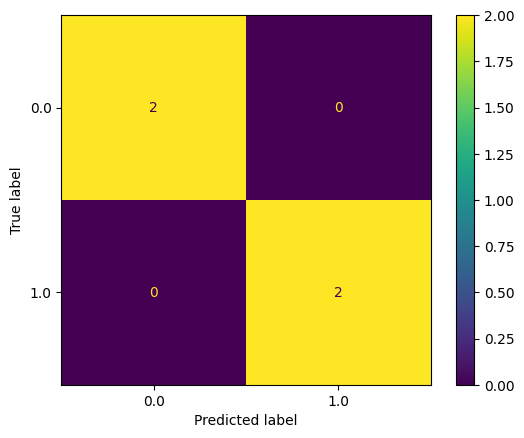

breast_cancer_wisconsin_diagnostic
{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.9802197802197802, Test accuracy = 0.9473684210526315
knn, Train f1-score = 0.9801024331803986, Test f1-score = 0.9473684210526315
Confusion Matrix for train set


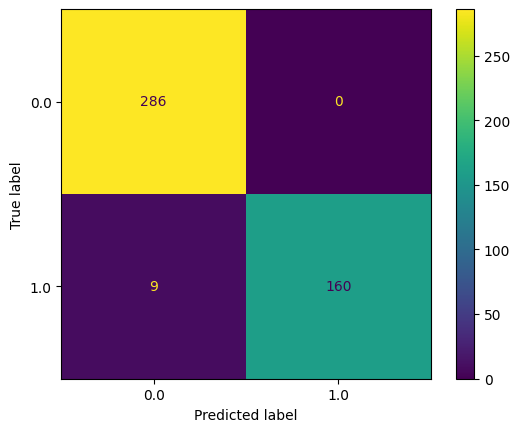

Confusion Matrix for test set


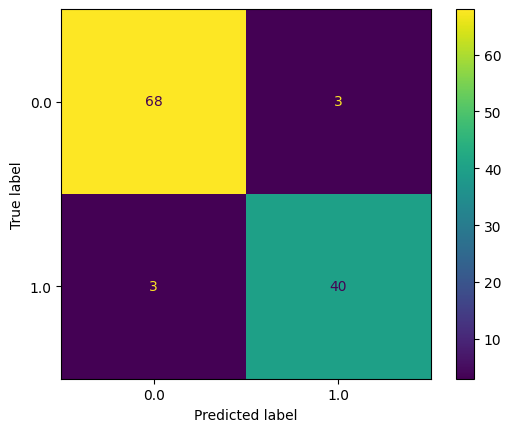

car_evaluation


c:\Users\britt\OneDrive - Luleå University of Technology\AppliedAI\MiniProject\D7041E_Mini_project\utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_cols] = encode_categorical_features(X[categorical_cols], encoder)


{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.975397973950796, Test accuracy = 0.9364161849710982
knn, Train f1-score = 0.9749809429919429, Test f1-score = 0.937155858705312
Confusion Matrix for train set


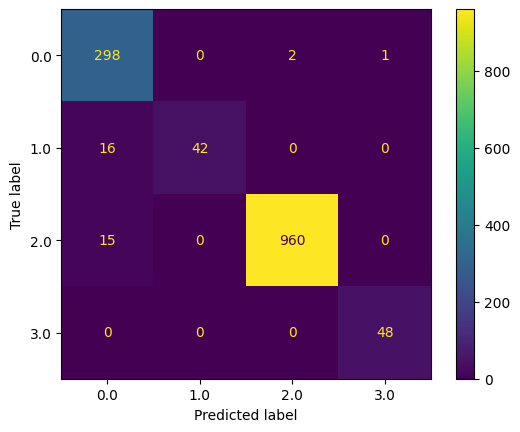

Confusion Matrix for test set


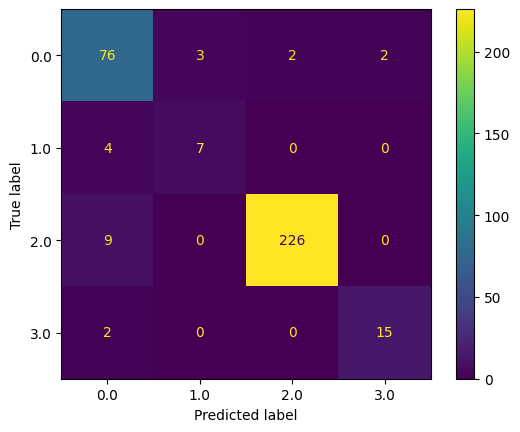

congress_voting_records
{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.918918918918919, Test accuracy = 0.9787234042553191
knn, Train f1-score = 0.9190898108084373, Test f1-score = 0.9787234042553191
Confusion Matrix for train set


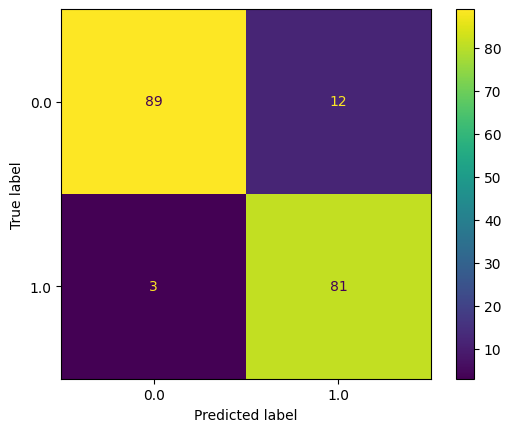

Confusion Matrix for test set


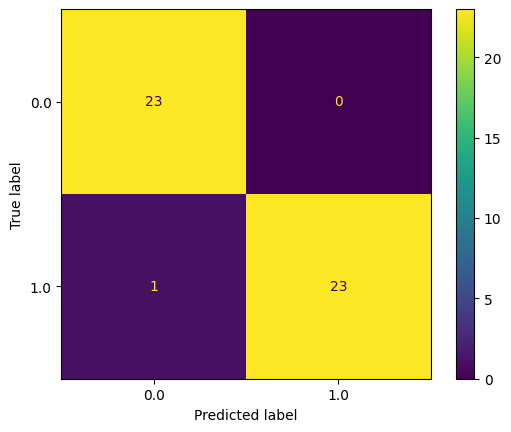

credit_approval
{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.8908045977011494, Test accuracy = 0.8625954198473282
knn, Train f1-score = 0.8904702751997797, Test f1-score = 0.862215392749744
Confusion Matrix for train set


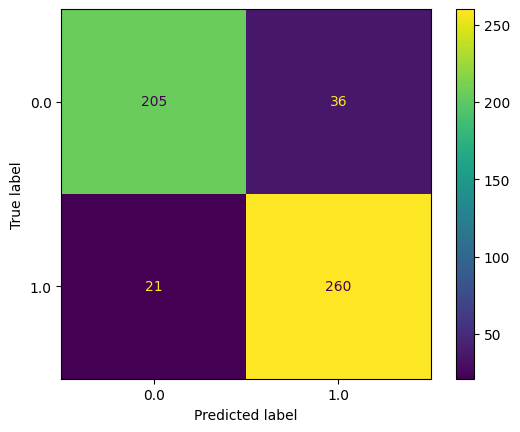

Confusion Matrix for test set


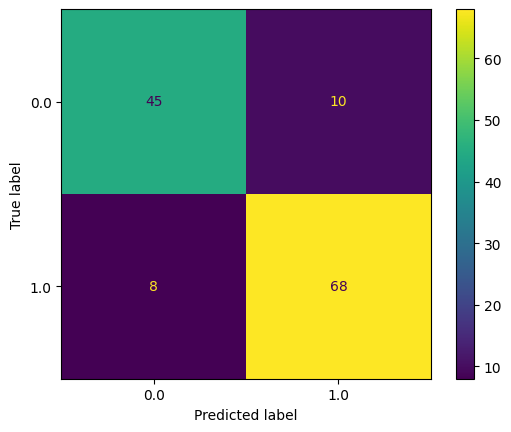

ecoli


c:\Users\britt\anaconda3\envs\AppliedAILabs\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.8970588235294118
knn, Train f1-score = 1.0, Test f1-score = 0.8895731426899118
Confusion Matrix for train set


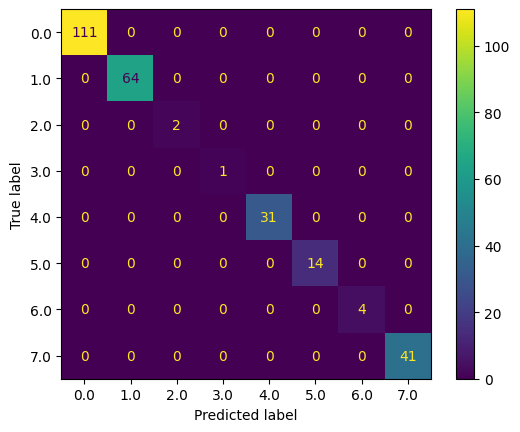

Confusion Matrix for test set


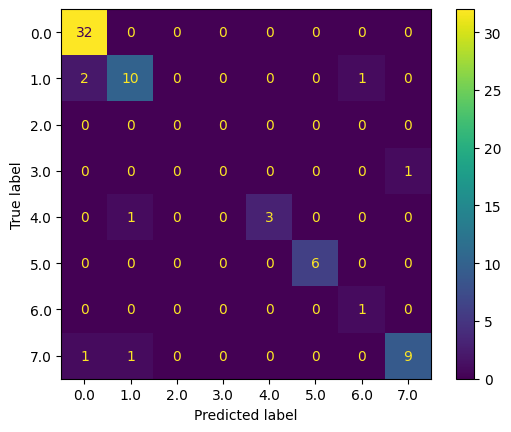

fertility
{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.875, Test accuracy = 0.9
knn, Train f1-score = 0.8166666666666667, Test f1-score = 0.8526315789473683
Confusion Matrix for train set


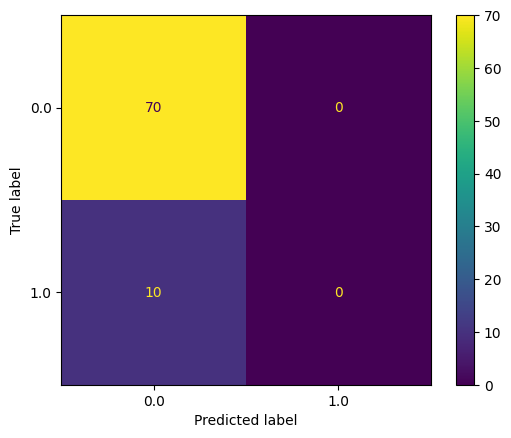

Confusion Matrix for test set


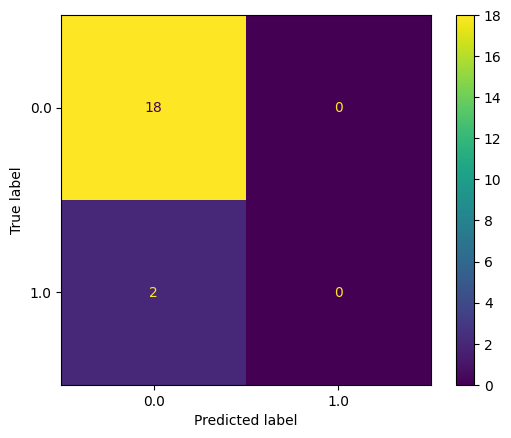

habermans_survival


c:\Users\britt\OneDrive - Luleå University of Technology\AppliedAI\MiniProject\D7041E_Mini_project\utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_cols] = encode_categorical_features(X[categorical_cols], encoder)


{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.7663934426229508, Test accuracy = 0.6774193548387096
knn, Train f1-score = 0.7401360335450284, Test f1-score = 0.6318428115663139
Confusion Matrix for train set


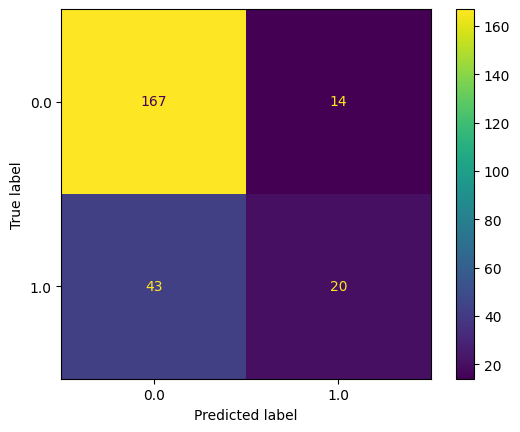

Confusion Matrix for test set


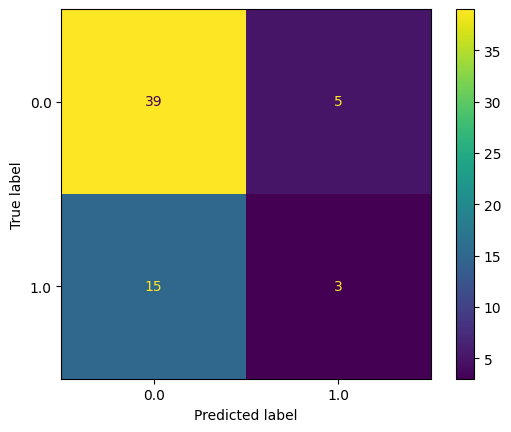

hayes_roth
{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
knn, Train accuracy = 0.9428571428571428, Test accuracy = 0.7037037037037037
knn, Train f1-score = 0.9428571428571428, Test f1-score = 0.7092790250684987
Confusion Matrix for train set


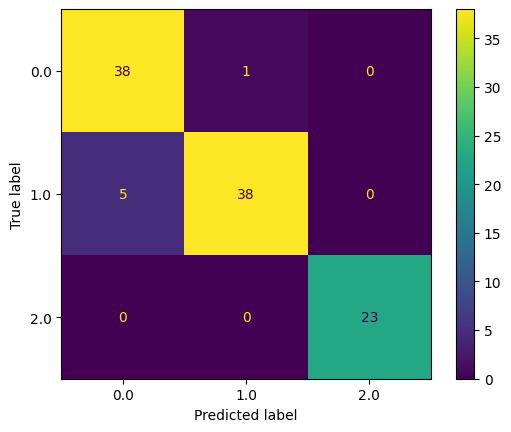

Confusion Matrix for test set


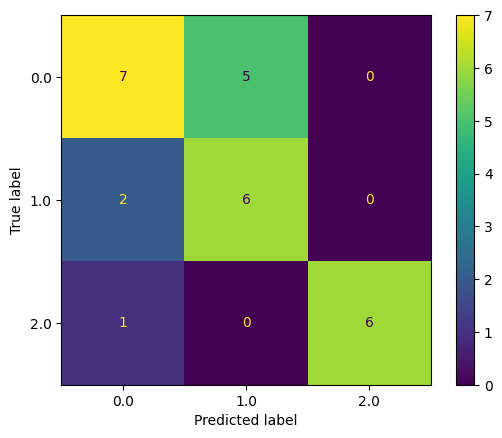

heart_disease
{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.6919831223628692, Test accuracy = 0.6
knn, Train f1-score = 0.6616280980201381, Test f1-score = 0.5309451219512195
Confusion Matrix for train set


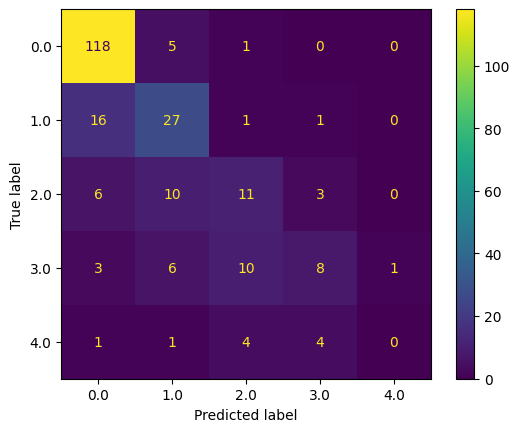

Confusion Matrix for test set


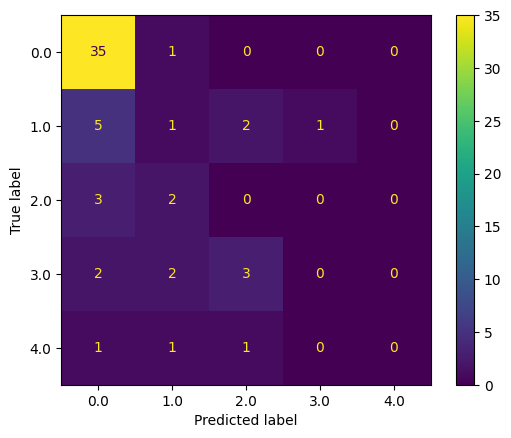

ilpd
{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.5775862068965517
knn, Train f1-score = 1.0, Test f1-score = 0.5420125079929506
Confusion Matrix for train set


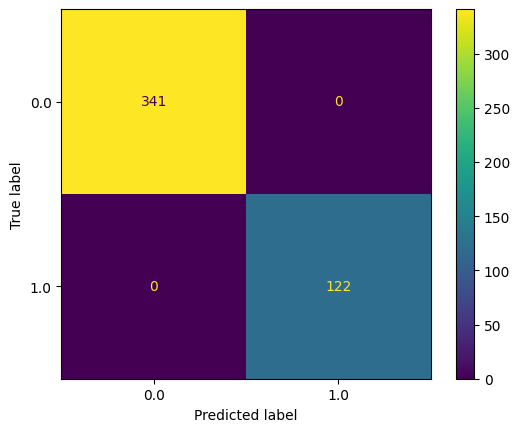

Confusion Matrix for test set


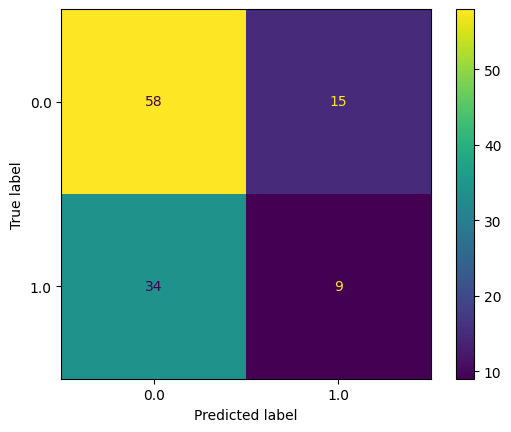

iris
{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.95, Test accuracy = 1.0
knn, Train f1-score = 0.949937343358396, Test f1-score = 1.0
Confusion Matrix for train set


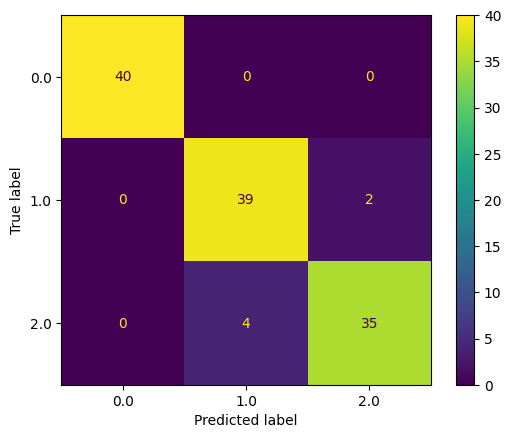

Confusion Matrix for test set


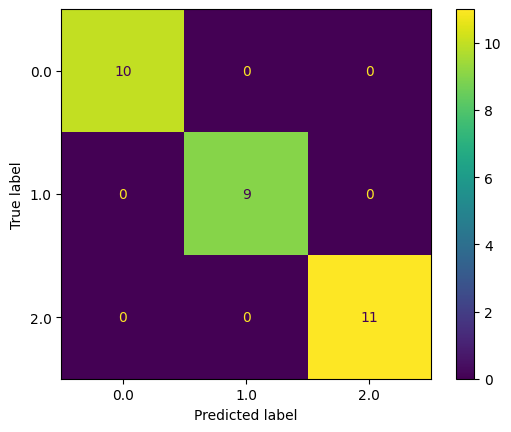

lenses


c:\Users\britt\OneDrive - Luleå University of Technology\AppliedAI\MiniProject\D7041E_Mini_project\utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_cols] = encode_categorical_features(X[categorical_cols], encoder)


{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
knn, Train accuracy = 0.8947368421052632, Test accuracy = 1.0
knn, Train f1-score = 0.8918660287081339, Test f1-score = 1.0
Confusion Matrix for train set


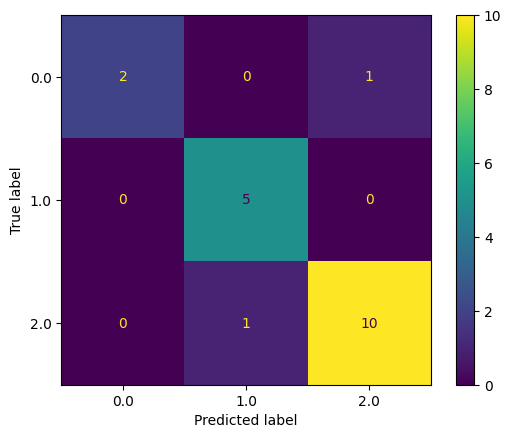

Confusion Matrix for test set


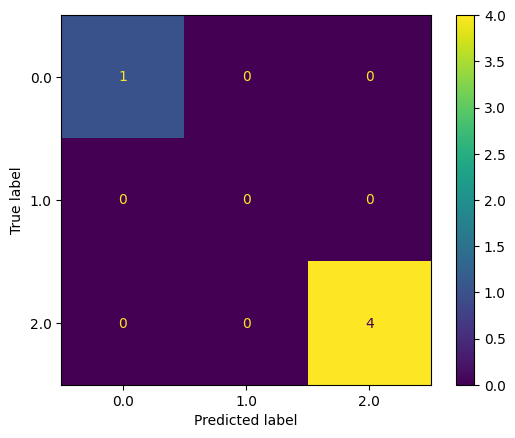

mammographic_mass
{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.8373493975903614, Test accuracy = 0.7951807228915663
knn, Train f1-score = 0.8372903185149884, Test f1-score = 0.7949711125202564
Confusion Matrix for train set


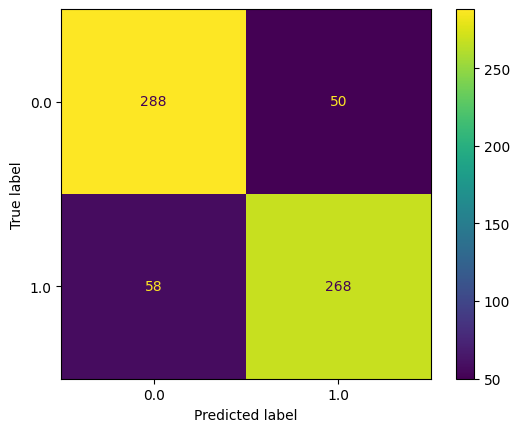

Confusion Matrix for test set


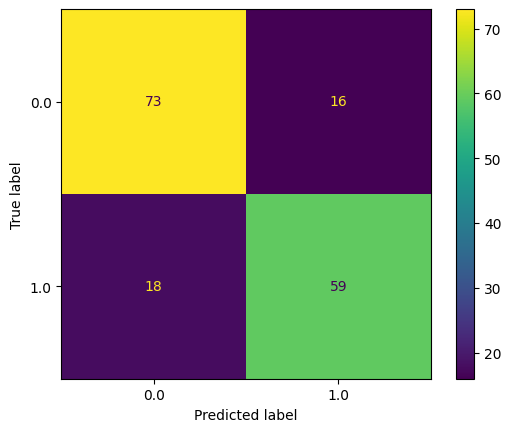

mushroom
{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
knn, Train accuracy = 1.0, Test accuracy = 1.0
knn, Train f1-score = 1.0, Test f1-score = 1.0
Confusion Matrix for train set


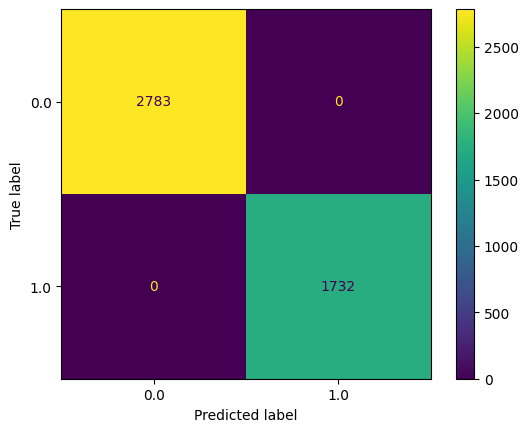

Confusion Matrix for test set


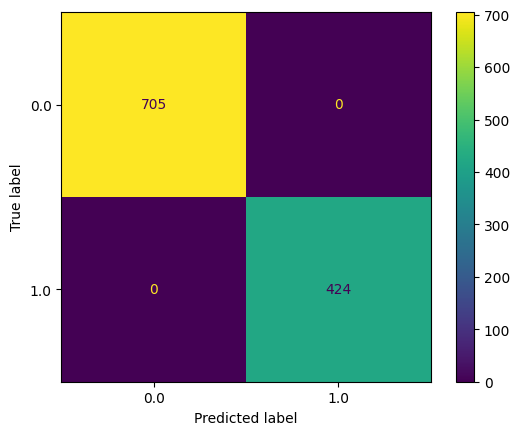

statlog
{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.79375, Test accuracy = 0.77
knn, Train f1-score = 0.7765116438837657, Test f1-score = 0.7389290475485114
Confusion Matrix for train set


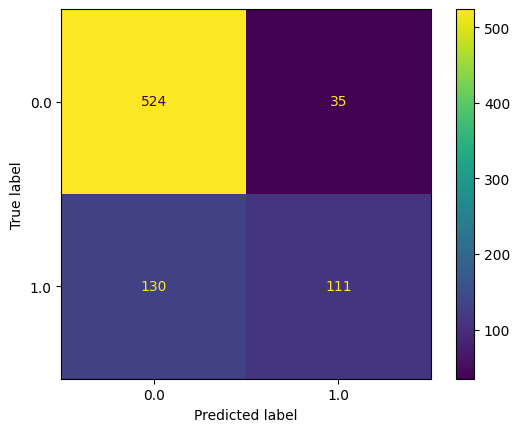

Confusion Matrix for test set


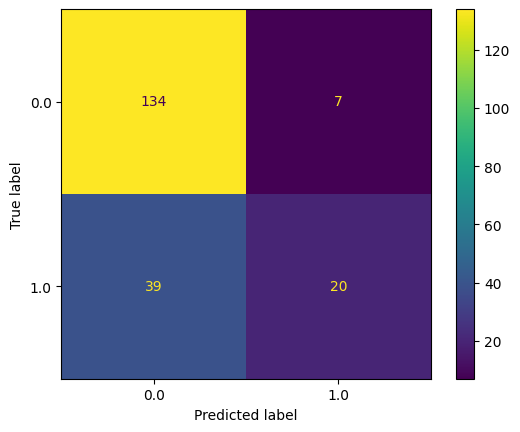

wine_quality
{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.6584615384615384
knn, Train f1-score = 1.0, Test f1-score = 0.6499910171640016
Confusion Matrix for train set


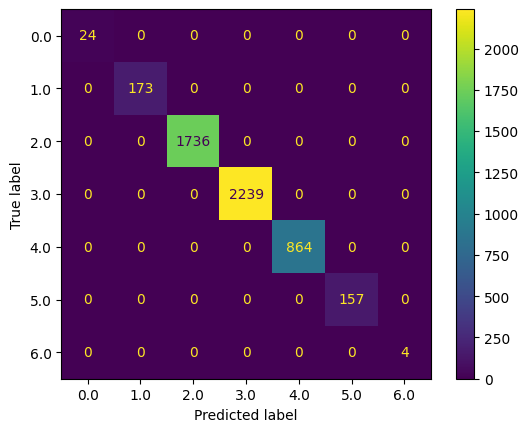

Confusion Matrix for test set


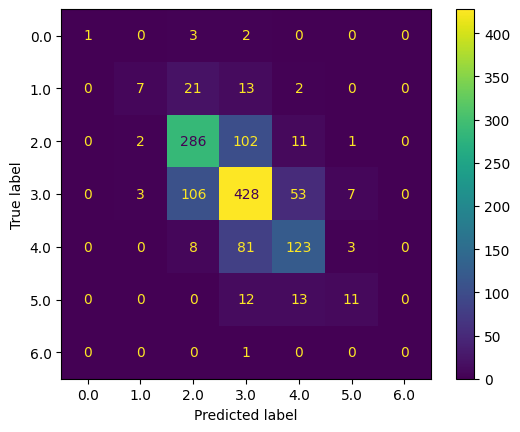

zoo


c:\Users\britt\OneDrive - Luleå University of Technology\AppliedAI\MiniProject\D7041E_Mini_project\utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_cols] = encode_categorical_features(X[categorical_cols], encoder)


{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.9523809523809523
knn, Train f1-score = 1.0, Test f1-score = 0.9333333333333333
Confusion Matrix for train set


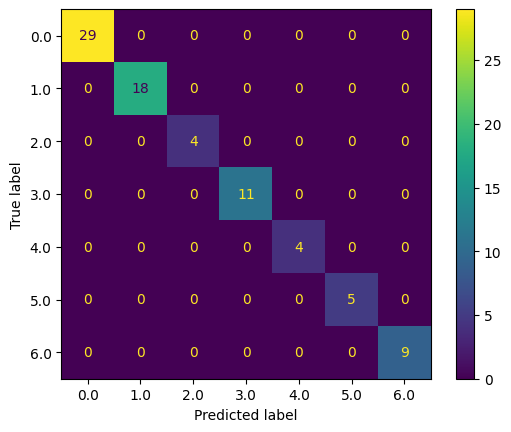

Confusion Matrix for test set


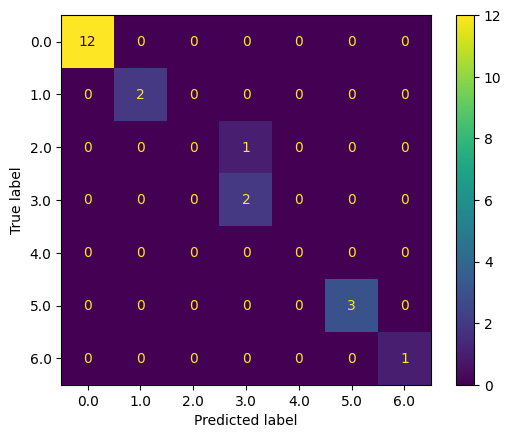

In [14]:
for name, id in data_set_sorted.items():

        print(name)
    
        ordinal_encoder = OrdinalEncoder()
        X, y = import_dataset(dataset_id[name], ordinal_encoder)
        y = encode_categorical_features(y, ordinal_encoder)

        # split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

        # KNN
        # https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
        knn = KNeighborsClassifier()
        params = [{'knn__n_neighbors': [3, 5, 7, 9],
                'knn__weights': ['uniform', 'distance'],
                'knn__leaf_size': [15, 20]}]

        test_classifier(knn, "knn", params, X_train, y_train, X_test, y_test)

In [4]:
ordinal_encoder = OrdinalEncoder()
X, y = import_dataset(dataset_id["wine_quality"], ordinal_encoder)
y = encode_categorical_features(y, ordinal_encoder)

In [5]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

# Testing different classifiers

# K-Nearest Neighbor classifier

{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.6584615384615384
knn, Train f1-score = 1.0, Test f1-score = 0.6499910171640016
Confusion Matrix for train set


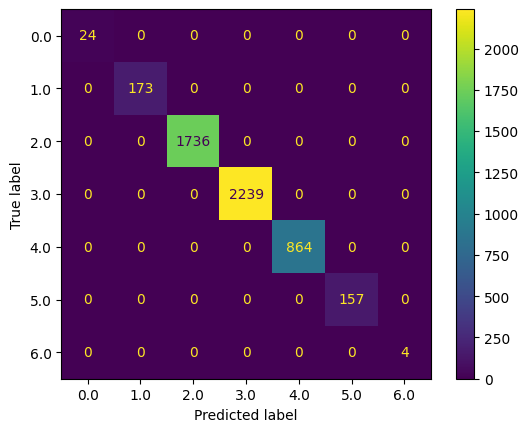

Confusion Matrix for test set


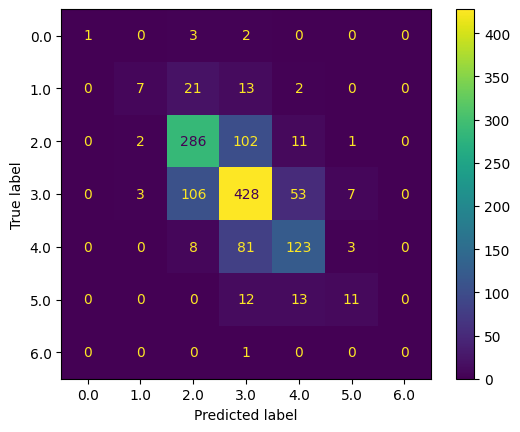

In [6]:
# https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
knn = KNeighborsClassifier()
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

test_classifier(knn, "knn", params, X_train, y_train, X_test, y_test)


# SVM

{'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
svm, Train accuracy = 0.9951895324225515, Test accuracy = 0.6384615384615384
svm, Train f1-score = 0.9951902890902109, Test f1-score = 0.6296839877108256
Confusion Matrix for train set


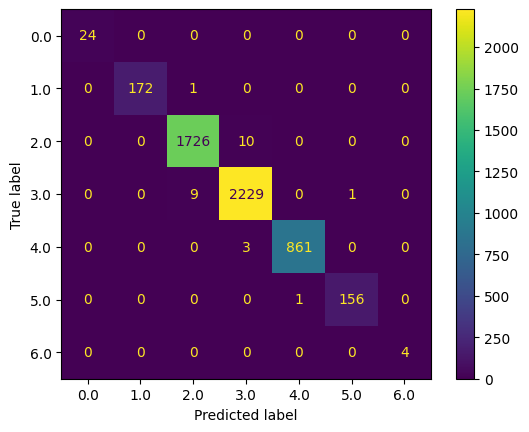

Confusion Matrix for test set


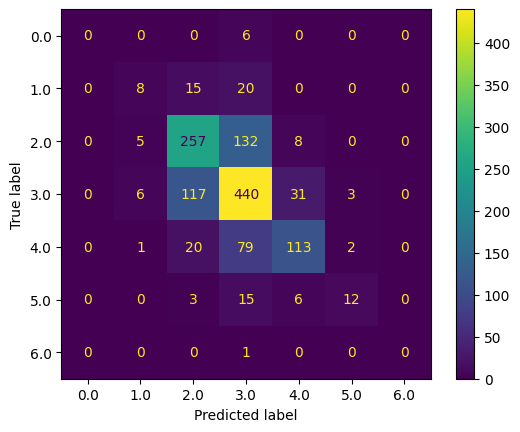

In [7]:
svm = SVC()
# params taken from here: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
params = [{'svm__C': [0.1, 1, 10, 100, 1000],  
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'svm__kernel': ['rbf']} ]

test_classifier(svm, "svm", params, X_train, y_train, X_test, y_test)

# Linear Regression

c:\Users\britt\anaconda3\envs\AppliedAILabs\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\britt\anaconda3\envs\AppliedAILabs\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

{'log_reg__C': 1.0, 'log_reg__max_iter': 100, 'log_reg__penalty': 'l2'}
log_reg, Train accuracy = 0.5520492591879931, Test accuracy = 0.5361538461538462
log_reg, Train f1-score = 0.519241700281263, Test f1-score = 0.5019301746551242
Confusion Matrix for train set


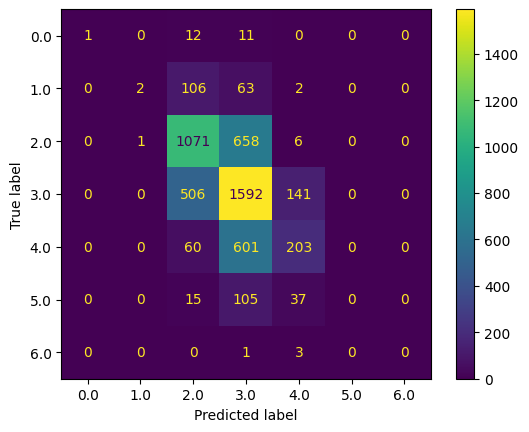

Confusion Matrix for test set


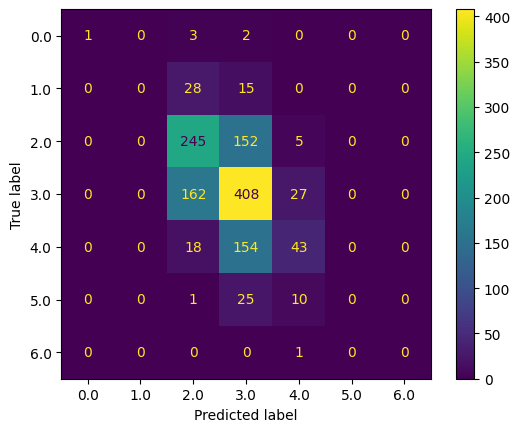

In [8]:
log_reg = LogisticRegression()
# params taken from here: https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/
# and from here https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression
params = [
    {'log_reg__penalty':['l1','l2'],
    'log_reg__C' : np.logspace(-3,3,7),
    'log_reg__max_iter'  : [100,1000,2500,5000]
}
]

test_classifier(log_reg, "log_reg", params, X_train, y_train, X_test, y_test)

# Unsupervised Classification

# Add Agglomerative Clustering
https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

In [9]:
agg_clustering(X_train, y_train, X_test, y_test)

Best score 0.43377312873143536 with params {'metric': 'euclidean', 'linkage': 'single', 'pca': True}
Test accuracy = 0.4623076923076923
